#### Practical No.6 
# Simple Linear Regression  
### Ghanshyam Kanojiya
Using Indian Food Dataset (prep_time vs cook_time)


## Introduction

In this notebook, we perform **Simple Linear Regression** using the `indian_food.csv` dataset.

We will:

1. Load and inspect the dataset  
2. Select two numerical variables:  
   - `prep_time` (independent variable X)  
   - `cook_time` (dependent variable y)  
3. Visualise the relationship between preparation time and cooking time  
4. Fit a simple linear regression model  
5. Evaluate the model using R² and error metrics  
6. Visualise training and testing predictions  
7. Interpret the regression line (slope and intercept)  


## Import Required Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_theme()


## Load the Indian Food Dataset

In [2]:
# Load the dataset
df = pd.read_csv('indian_food.csv')

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (255, 9)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## Dataset Overview

In [3]:
# Info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [4]:
# Check for missing values
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

### Variables of Interest

For simple linear regression we need:

- One **independent variable (X)**  
- One **dependent variable (y)**  

In this context:

- `prep_time` = time required for preparation (minutes) → X  
- `cook_time` = time required for cooking (minutes) → y  

We want to see whether dishes that take longer to prepare also tend to take longer to cook,  
and if we can predict `cook_time` from `prep_time`.


## Exploratory Data Analysis – Scatter Plot

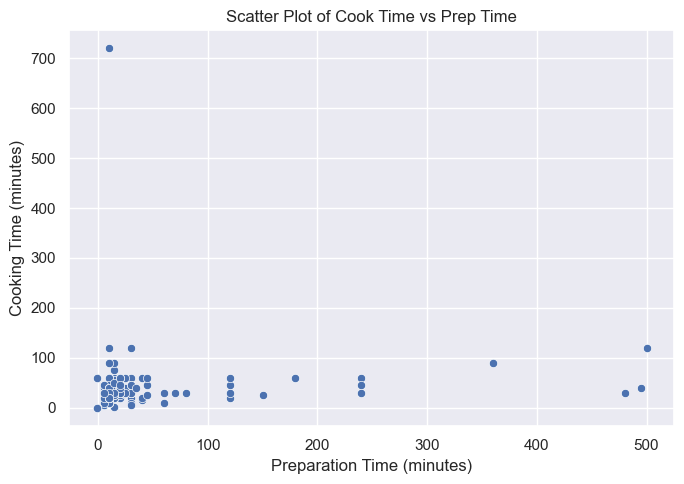

In [5]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='prep_time', y='cook_time')
plt.title('Scatter Plot of Cook Time vs Prep Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.tight_layout()
plt.show()

## Select Features and Target

In [6]:
# Drop rows where prep_time or cook_time is missing
data = df[['prep_time', 'cook_time']].dropna()

X = data[['prep_time']]  # 2D array for sklearn
y = data['cook_time']    # 1D array

print("Number of valid records:", len(data))
X.head(), y.head()

Number of valid records: 255


(   prep_time
 0         45
 1         80
 2         15
 3         15
 4         15,
 0    25
 1    30
 2    60
 3    30
 4    40
 Name: cook_time, dtype: int64)

## Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 204
Test set size: 51


## Fit Simple Linear Regression Model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("Model trained successfully.")

Model trained successfully.


## Model Evaluation on Training Data

In [9]:
# Predictions on training data
y_train_pred = regressor.predict(X_train)

# R² score
r2_train = r2_score(y_train, y_train_pred)

# Error metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training R²:", r2_train)
print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training MAE:", mae_train)

Training R²: 0.017565987179042675
Training MSE: 2717.4517617147226
Training RMSE: 52.12918339773531
Training MAE: 18.913308867306426


## Model Evaluation on Test Data

In [10]:
y_test_pred = regressor.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Test R²:", r2_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)

Test R²: 0.014303473287063162
Test MSE: 498.30843850328876
Test RMSE: 22.322823264616165
Test MAE: 16.989837773999195


## Plot: Training Data with Regression Line

c:\Users\kanoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


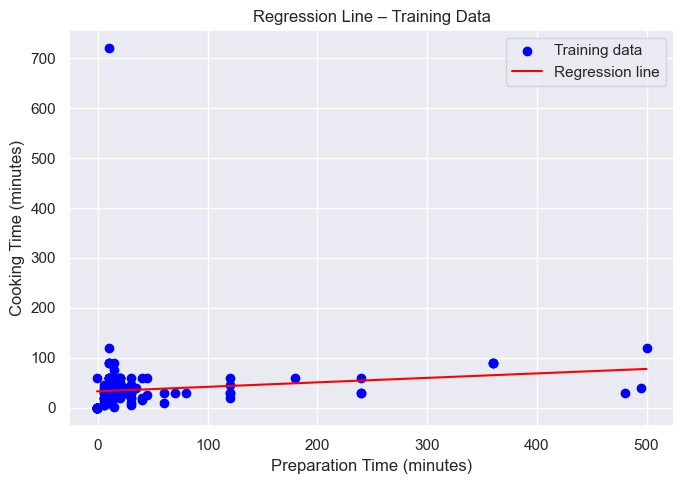

In [11]:
plt.figure(figsize=(7, 5))

# Scatter of training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Regression line: sort X for a clean line
X_line = np.linspace(X_train['prep_time'].min(), X_train['prep_time'].max(), 100).reshape(-1, 1)
y_line = regressor.predict(X_line)

plt.plot(X_line, y_line, color='red', label='Regression line')

plt.title('Regression Line – Training Data')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.legend()
plt.tight_layout()
plt.show()

## Plot: Test Data vs Predictions

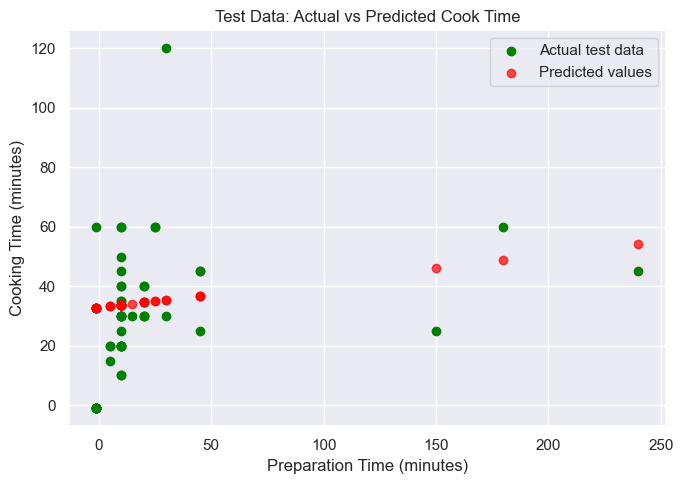

In [12]:
plt.figure(figsize=(7, 5))

# Scatter of test data
plt.scatter(X_test, y_test, color='green', label='Actual test data')

# Predicted points for same X_test
plt.scatter(X_test, y_test_pred, color='red', alpha=0.7, label='Predicted values')

plt.title('Test Data: Actual vs Predicted Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.legend()
plt.tight_layout()
plt.show()

## Regression Line Equation

In [13]:
coef = regressor.coef_[0]
intercept = regressor.intercept_

print(f'Coefficient (slope): {coef}')
print(f'Intercept: {intercept}')
print(f'Linear equation: cook_time = {coef:.3f} * prep_time + {intercept:.3f}')

Coefficient (slope): 0.08967631974898015
Intercept: 32.82482147579001
Linear equation: cook_time = 0.090 * prep_time + 32.825


### Interpretation

- The **slope (coefficient)** tells us how much the cooking time is expected to change  
  when preparation time increases by 1 minute.  
- The **intercept** is the expected cooking time when preparation time is 0 (not always meaningful physically,  
  but required for the linear equation).  
- The R² score tells us how well `prep_time` explains the variation in `cook_time`.  

This demonstrates simple linear regression on a real dataset using two related time variables.
